In [1]:
import os

import cv2
from PIL import Image
import random
import numpy as np
from utils.detect_line import detect_lines
from utils.hot import hot_detect_line

import json

In [2]:
ori_img = cv2.imread('../static/img/4.png')
lines = hot_detect_line('../static/img/4.png', None, None, 0, path='../static/record/')
# white = np.ones((height[1]-height[0], width[1]-width[0], 3), dtype=np.uint8) * 255
white = np.ones_like(ori_img) * 255
for line in lines:
    cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)


正在重载 lines 4.png[None:None, None:None]


In [3]:
Image.fromarray(ori_img).save("workdir/run/0.png")
Image.fromarray(white).save("workdir/run/1.png")

In [3]:
# 颜色过滤
def color_filter(lines, color):
    return [line for line in lines if line[2] != color]
#是竖线
def _is_vertical(line):
    return line[0][0] - line[1][0] == 0
def _is_horizontal(line):
    return line[0][1] - line[1][1] == 0
# 斜线和直线分层
def line_filter(lines):
    lines_a = []
    lines_b = []
    for line in lines:
        if _is_vertical(line) or _is_horizontal(line):
            lines_a.append(line)
        else:
            lines_b.append(line)
    return lines_a, lines_b

In [4]:
# 去黑线
lines_a = [line for line in lines if tuple(line[2]) != (0, 0, 0)]
# line_a = color_filter(lines, (57, 114, 57))
# line_a, line_b = line_filter(line_a)

In [18]:
white = np.ones_like(ori_img) * 255
for line in lines_a:
    cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)
Image.fromarray(white).save("workdir/run/a.png")
# for line in line_b:
#     cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)
# Image.fromarray(white).save("workdir/run/b.png")

In [6]:
len(lines_a)

143623

In [7]:
from utils.detect_connect import detect_connect
from utils.hot import hot_dectect_connect
groups = hot_dectect_connect(f'../static/img/{4}.png', None, None, 0, path='../static/record/')

正在重载 connect 4.png[None:None, None:None]


In [10]:
# with open("workdir/record/group_4.json", "w") as f:
#     json.dump(groups, f)
# groups
# groups = json.load(open("workdir/record/group_4.json"))

[[[(3462, 1472), (3495, 1456), (255, 0, 0)]],
 [[(3468, 1459), (3495, 1472), (255, 0, 0)]],
 [[(3405, 1478), (3434, 1469), (0, 255, 0)]],
 [[(3353, 1495), (3400, 1480), (0, 255, 0)]],
 [[(3304, 1511), (3348, 1497), (0, 255, 0)]],
 [[(3252, 1528), (3299, 1513), (0, 255, 0)]],
 [[(3200, 1545), (3247, 1530), (0, 255, 0)]],
 [[(3151, 1561), (3195, 1547), (0, 255, 0)]],
 [[(3099, 1578), (3146, 1563), (0, 255, 0)]],
 [[(3047, 1595), (3094, 1580), (0, 255, 0)],
  [(3022, 1603), (3046, 1596), (0, 255, 0)],
  [(2453, 1604), (3021, 1604), (0, 255, 0)]],
 [[(3587, 1392), (3655, 1461), (0, 255, 0)],
  [(3655, 1461), (3724, 1392), (0, 255, 0)],
  [(3585, 1390), (3953, 1390), (0, 255, 0)]],
 [[(3953, 1262), (3964, 1251), (0, 255, 0)],
  [(3553, 1251), (3564, 1262), (0, 255, 0)],
  [(3788, 1097), (3799, 1086), (0, 255, 0)],
  [(3788, 1251), (3799, 1262), (0, 255, 0)],
  [(3953, 1086), (3964, 1097), (0, 255, 0)],
  [(3718, 1086), (3729, 1097), (0, 255, 0)],
  [(3718, 1262), (3729, 1251), (0, 255, 0)],

In [8]:
def arrange_group(groups):
    groups_by_len = {}
    for it in groups:
        if len(it) not in groups_by_len:
            groups_by_len[len(it)] = []
        groups_by_len[len(it)].append(it)
    return groups_by_len
groups_by_len = arrange_group(groups)

def count_group(groups):
    groups_by_len = arrange_group(groups)
    lens = {}
    for k, v in groups_by_len.items():
        lens[k] = len(v)
    return sorted(lens.items(), key=lambda x:x[0])
lens = count_group(groups)
lens

[(1, 13874),
 (2, 5117),
 (3, 2307),
 (4, 5759),
 (5, 1195),
 (6, 2690),
 (7, 406),
 (8, 434),
 (9, 343),
 (10, 422),
 (11, 231),
 (12, 304),
 (13, 115),
 (14, 204),
 (15, 141),
 (16, 86),
 (17, 92),
 (18, 166),
 (19, 112),
 (20, 74),
 (21, 63),
 (22, 61),
 (23, 69),
 (24, 51),
 (25, 34),
 (26, 33),
 (27, 20),
 (28, 25),
 (29, 12),
 (30, 9),
 (31, 14),
 (32, 11),
 (33, 11),
 (34, 7),
 (35, 3),
 (36, 4),
 (37, 4),
 (38, 3),
 (39, 1),
 (40, 1),
 (41, 3),
 (42, 3),
 (43, 1),
 (44, 6),
 (45, 6),
 (46, 7),
 (47, 14),
 (48, 25),
 (49, 18),
 (50, 21),
 (51, 21),
 (52, 21),
 (53, 24),
 (54, 24),
 (55, 20),
 (56, 12),
 (57, 8),
 (58, 4),
 (59, 9),
 (60, 4),
 (61, 4),
 (63, 2),
 (64, 3),
 (66, 2),
 (67, 1),
 (69, 1),
 (70, 3),
 (72, 1),
 (78, 1),
 (80, 3),
 (82, 2),
 (85, 2),
 (86, 1),
 (87, 1),
 (96, 1),
 (98, 1),
 (100, 1),
 (108, 1),
 (113, 1),
 (139, 1),
 (140, 1),
 (141, 1),
 (175, 1),
 (217, 1),
 (238, 2),
 (250, 1),
 (764, 1),
 (767, 1),
 (957, 1),
 (1234, 1)]

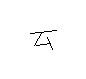

In [11]:
from utils.detect_connect import get_max_coord
from utils.detect_connect import get_min_coord

def draw_group(group, padding=30):
    max_x, max_y = get_max_coord(group)
    min_x, min_y = get_min_coord(group)
    width, height = max_x - min_x, max_y - min_y
    white = np.ones((height + 2 * padding, width + 2 * padding, 3), dtype=np.uint8) * 255
    ax = -min_x + padding
    ay = -min_y + padding
    for line in group:
        cv2.line(white, (line[0][0] + ax, line[0][1] + ay), (line[1][0] + ax, line[1][1] + ay), line[2], 1)
    return white

white = draw_group(groups_by_len[4][2])
Image.fromarray(white)

In [9]:
from tqdm import tqdm

SAVE_DIR = f"workdir/run/{random.randint(0, 1000000):07}/"
os.makedirs(SAVE_DIR, exist_ok=True)
for k in groups_by_len.keys():
    if k <= 3:
        continue
    os.makedirs(os.path.join(SAVE_DIR, f"{k}"), exist_ok=True)
    for idx, group in enumerate(tqdm(groups_by_len[k])):
        white = draw_group(group)
        Image.fromarray(white).save(os.path.join(SAVE_DIR, f"{k}", f"{idx}.png"))

100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


In [ ]:
os.path.join(SAVE_DIR, f"{k}", f"{idx}.png")

In [14]:
groups_by_len[5]

[[[(3909, 3884), (3928, 3875), (57, 114, 57)],
  [(3966, 3874), (3970, 3899), (57, 114, 57)],
  [(3909, 3844), (3963, 3870), (57, 114, 57)],
  [(3964, 3871), (3997, 3878), (57, 114, 57)],
  [(3911, 3885), (3974, 3901), (57, 114, 57)]],
 [[(2524, 2670), (2524, 3049), (128, 128, 128)],
  [(2539, 2519), (2539, 3200), (128, 128, 128)],
  [(2539, 2519), (2539, 3200), (128, 128, 128)],
  [(2524, 2670), (2538, 2670), (128, 128, 128)],
  [(2524, 3049), (2538, 3049), (128, 128, 128)]],
 [[(3168, 2670), (3168, 3049), (128, 128, 128)],
  [(3183, 2519), (3183, 3200), (128, 128, 128)],
  [(3183, 2519), (3183, 3200), (128, 128, 128)],
  [(3168, 2670), (3182, 2670), (128, 128, 128)],
  [(3168, 3049), (3182, 3049), (128, 128, 128)]],
 [[(3841, 3889), (3852, 3947), (57, 114, 57)],
  [(3735, 3878), (3789, 3885), (57, 114, 57)],
  [(3790, 3886), (3803, 3886), (57, 114, 57)],
  [(3804, 3887), (3847, 3888), (57, 114, 57)],
  [(3848, 3889), (3858, 3889), (57, 114, 57)]],
 [[(4167, 2519), (4167, 3200), (128,